# Cyclists Object Detection Using YOLOv5

### Helped Tutorial [YOLOv5 Tutorial](https://blog.paperspace.com/train-yolov5-custom-data/)

### Connect To Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Colne To Model Implementation Github


In [2]:
%%time

#Clone repository from github.com
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15393, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 15393 (delta 9), reused 17 (delta 6), pack-reused 15369
Receiving objects: 100% (15393/15393), 14.37 MiB | 13.28 MiB/s, done.
Resolving deltas: 100% (10522/10522), done.
CPU times: user 46.5 ms, sys: 7.6 ms, total: 54.1 ms
Wall time: 3.45 s


In [3]:
#installing pycocotools
# -q flag is used to run the installation process in quiet mode

!pip install -q -U pycocotools

### install dependencies

In [4]:
# add -q to quit long outputs
!pip install -q -r yolov5/requirements.txt                 #install dependencies
!cp yolov5/requirements.txt ./                             #copy file to current directory

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.9 MB/s eta 0:00:00


### Import Important Packages

In [14]:
import os, random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


# Training

In [6]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 77.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 kB 20.2 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=dea379ab7b521ed5188bcde6a6c15f5da3b03e300fd00d4894d0f871d873098a
  Stored in directory: /root/.cache/pip/wheels/b7/0a/67/ada2a22079218c75a88361c0782855cc72aebc4d18d0289d05
Successfully built pathtools


In [7]:
!wandb login 4415c71551df92d2cb65ca0893153761fa712ec2

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [8]:
!wandb init 

Let's setup this directory for W&B!
wandb: Which team should we use?
wandb: (1) walid-max28
wandb: (2) waleedshaban
wandb: (3) Manual entry
wandb: Enter your choice: 2
wandb: You chose 'waleedshaban'
wandb: Which project should we use?
wandb: (1) train
wandb: (2) Create New
wandb: Enter your choice: 1
wandb: You chose 'train'
This directory is configured!  Next, track a run:
* In your training script:
    import wandb
    wandb.init(project="train")
* then `python <train.py>`.



In [9]:
import wandb
wandb.init(project="train")

wandb: Currently logged in as: walid-max28 (waleedshaban). Use `wandb login --relogin` to force relogin


In [10]:
!python /content/yolov5/train.py --img 640\
 --cfg /content/drive/MyDrive/dataset/data_tsinghua/yolov5s.yaml\
  --hyp /content/drive/MyDrive/dataset/data_tsinghua/hyp.scratch.yaml\
   --batch 32 --epochs 10\
    --data /content/drive/MyDrive/dataset/data_tsinghua/data.yaml\
     --weights yolov5s.pt --workers 24 --name yolo_cyclists_det

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Currently logged in as: walid-max28 (waleedshaban). Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=/content/drive/MyDrive/dataset/data_tsinghua/yolov5s.yaml, data=/content/drive/MyDrive/dataset/data_tsinghua/data.yaml, hyp=/content/drive/MyDrive/dataset/data_tsinghua/hyp.scratch.yaml, epochs=10, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=24, project=yolov5/runs/train, name=yolo_cyclists_det, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=la

## Training Curves

### Precision Curve

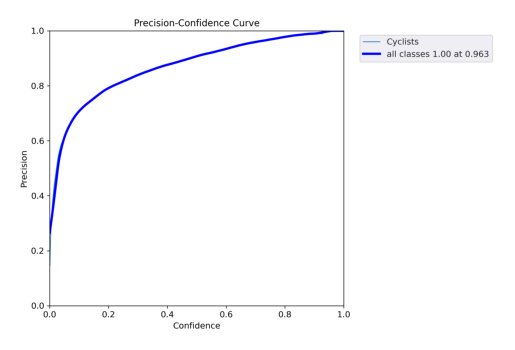

In [24]:
precision = Image.open('/content/yolov5/runs/train/yolo_cyclists_det/P_curve.png')
plt.imshow(np.array(precision))
plt.axis('off')
plt.show()

### Recall Curve

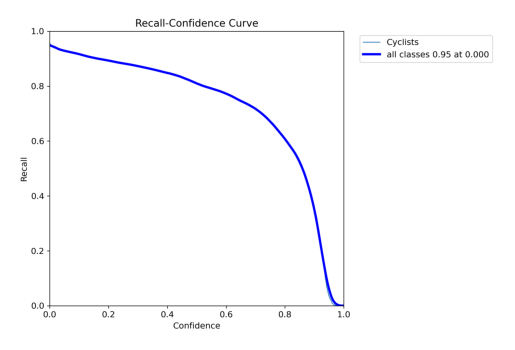

In [25]:
recall = Image.open('/content/yolov5/runs/train/yolo_cyclists_det/R_curve.png')
plt.imshow(np.array(recall))
plt.axis('off')
plt.show()

### Precision Recall Curve

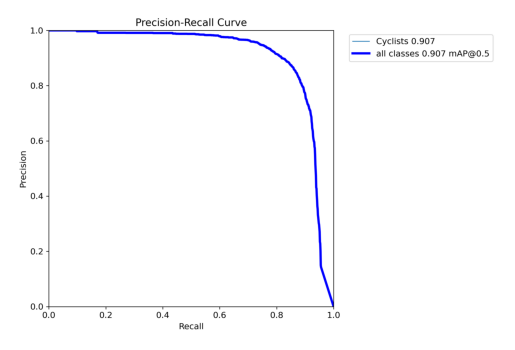

In [27]:
p_r = Image.open('/content/yolov5/runs/train/yolo_cyclists_det/PR_curve.png')
plt.imshow(np.array(p_r))
plt.axis('off')
plt.show()

### F1-Score Curve

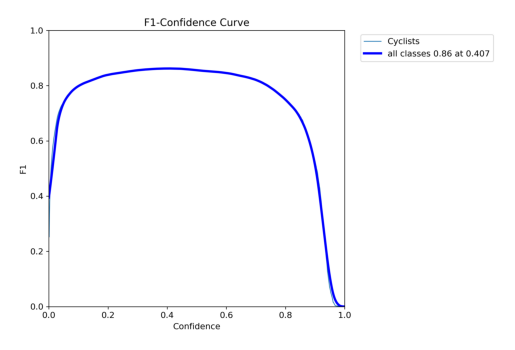

In [26]:
f1 = Image.open('/content/yolov5/runs/train/yolo_cyclists_det/F1_curve.png')
plt.imshow(np.array(f1))
plt.axis('off')
plt.show()

### Confusion Matrix

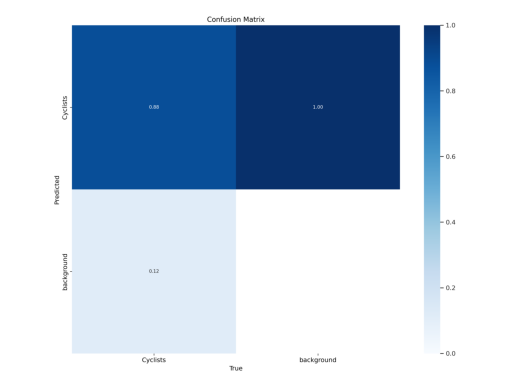

In [28]:
cm = Image.open('/content/yolov5/runs/train/yolo_cyclists_det/confusion_matrix.png')
plt.imshow(np.array(cm))
plt.axis('off')
plt.show()

### Model Results

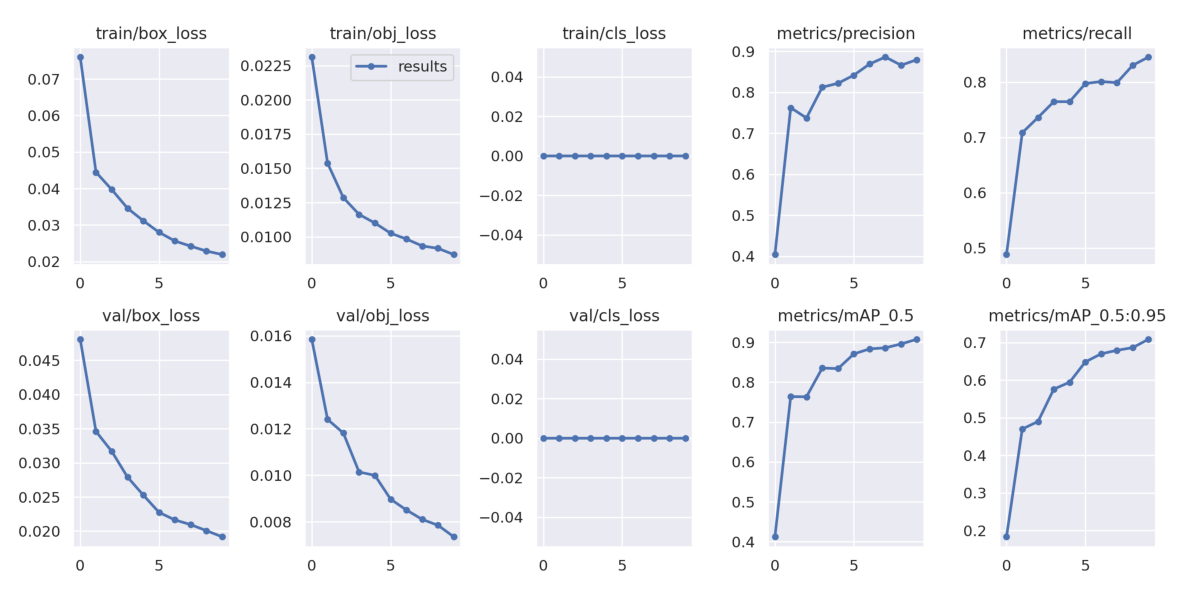

In [32]:
plt.figure(figsize=(15, 25))
model_results = Image.open('/content/yolov5/runs/train/yolo_cyclists_det/results.png')
plt.imshow(np.array(model_results))
plt.axis('off')
plt.show()

### Show Batch Of Reslut

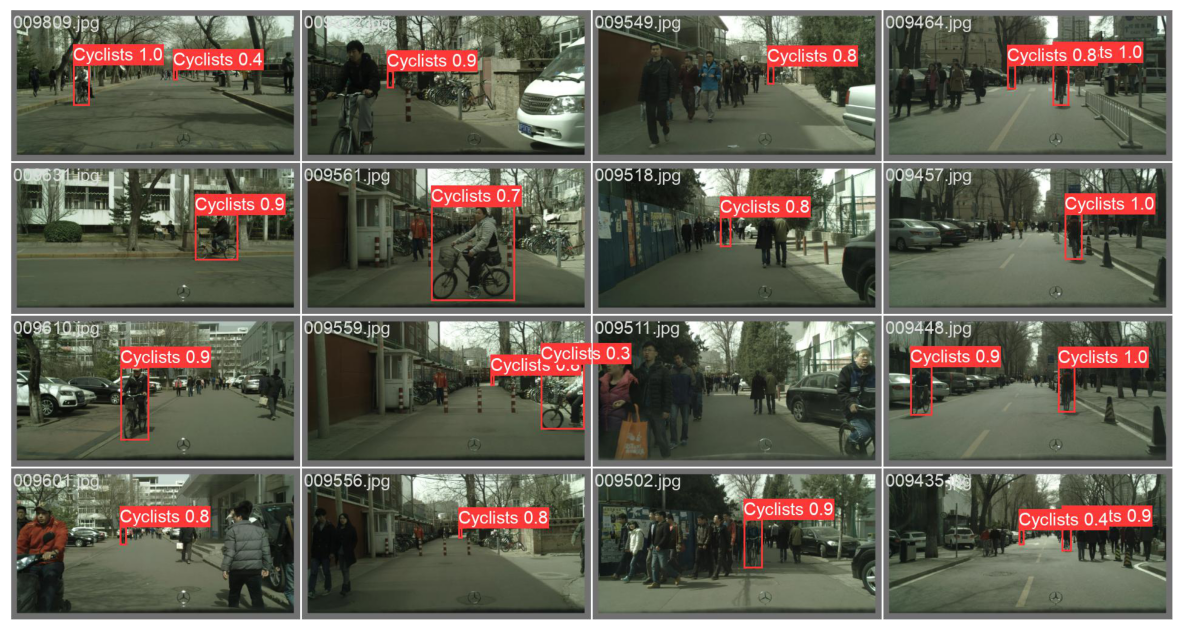

In [33]:
plt.figure(figsize=(15, 25))
val_batch = Image.open('/content/yolov5/runs/train/yolo_cyclists_det/val_batch2_pred.jpg')
plt.imshow(np.array(val_batch))
plt.axis('off')
plt.show()

### Detection In Test Data

In [11]:
!python /content/yolov5/detect.py\
 --source ../content/drive/MyDrive/dataset/data_tsinghua/test_data/images\
  --weights /content/yolov5/runs/train/yolo_cyclists_det/weights/best.pt\
   --conf 0.25 --name yolo_cyclists_det


detect: weights=['/content/yolov5/runs/train/yolo_cyclists_det/weights/best.pt'], source=../content/drive/MyDrive/dataset/data_tsinghua/test_data/images, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=yolo_cyclists_det, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-140-g1db9533 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 166 layers, 7053910 parameters, 0 gradients
image 1/2735 /content/drive/MyDrive/dataset/data_tsinghua/test_data/images/000000.jpg: 320x640 2 Cyclistss, 39.8ms
image 2/2735 /content/drive/MyDrive/dataset/data_tsinghua/test_data/images/000005.jpg: 320x640 2 Cyclistss, 7.7ms
image 3/2735 /content/drive

In [12]:
detections_dir = "/content/yolov5/runs/detect/yolo_cyclists_det/"
detection_images = [os.path.join(detections_dir, x) \
                    for x in os.listdir(detections_dir)]

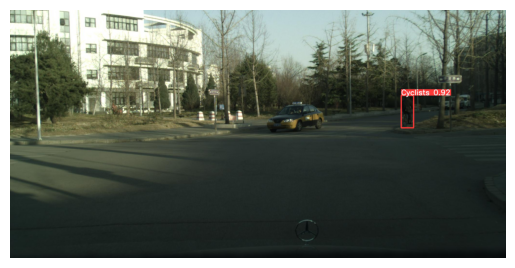

In [15]:
random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))
plt.axis('off')
plt.show()

### Testing

In [16]:
!python /content/yolov5/val.py\
 --weights /content/yolov5/runs/train/yolo_cyclists_det/weights/best.pt\
  --data /content/drive/MyDrive/dataset/data_tsinghua/data.yaml\
   --task test --name yolo_det


val: data=/content/drive/MyDrive/dataset/data_tsinghua/data.yaml, weights=['/content/yolov5/runs/train/yolo_cyclists_det/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=yolo_det, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-140-g1db9533 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 166 layers, 7053910 parameters, 0 gradients
test: Scanning /content/drive/MyDrive/dataset/data_tsinghua/test_data/labels... 2735 images, 348 backgrounds, 0 corrupt: 100% 2735/2735 [24:53<00:00,  1.83it/s]
test: New cache created: /content/drive/MyDrive/dataset/data_tsinghua/test_data/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 86/86 [01:48<00:00,  1.26s/it]
               

### Save Result To Drive

In [19]:
!mkdir /content/drive/MyDrive/YOLOv5_Model
!cp -r /content/yolov5/runs  /content/drive/MyDrive/YOLOv5_Model

mkdir: cannot create directory ‘/content/drive/MyDrive/YOLOv5_Model’: File exists
